In [2]:
import sys
sys.path.append('../src')
from data import get_documents_list

from sentence_transformers import SentenceTransformer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


loaded spacy language model: en_core_web_sm


https://www.sbert.net/docs/pretrained_models.html#multi-lingual-models

In [3]:
embedder = SentenceTransformer('distiluse-base-multilingual-cased-v1')

In [49]:
from data import get_documents_list, get_cleaned_dataframe_with_topics
from models import classification, get_embedding_model, get_BERTopic_model

df = get_cleaned_dataframe_with_topics()
df['cleaned_texts_embeddings'] = df['cleaned_texts'].apply(embedder.encode)
#df.head() # überall doppelte Klammern!

#embeddings = embedder.encode(documents)

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['cleaned_texts_embeddings'], df['label'], test_size=0.2)

In [51]:
X_train_vect_avg = classification.average_vector(X_train)
X_test_vect_avg = classification.average_vector(X_test)

In [52]:
y_pred = classification.classify_predict(X_train_vect_avg, X_test_vect_avg, y_train, "Random Forest")
classification.print_classification_report(y_test, y_pred)

y_pred = classification.classify_predict(X_train_vect_avg, X_test_vect_avg, y_train, "Multinomial Naive Bayes")
classification.print_classification_report(y_test, y_pred)

y_pred = classification.classify_predict(X_train_vect_avg, X_test_vect_avg, y_train, "SVM")
classification.print_classification_report(y_test, y_pred)

############################################################################
Processing Random Forest Classification

              precision    recall  f1-score   support

    verfolgt       1.00      0.81      0.90        37
    begnadet       0.12      1.00      0.22         1

    accuracy                           0.82        38
   macro avg       0.56      0.91      0.56        38
weighted avg       0.98      0.82      0.88        38

classes in y_pred: {0, 1} classes in y_test: {0, 1}
############################################################################
############################################################################
Processing Multinomial Naive Bayes Classification

              precision    recall  f1-score   support

    verfolgt       0.87      0.81      0.84        32
    begnadet       0.25      0.33      0.29         6

    accuracy                           0.74        38
   macro avg       0.56      0.57      0.56        38
weighted avg       0.77   

0    127
1     22
Name: label, dtype: int64


<AxesSubplot: ylabel='label'>

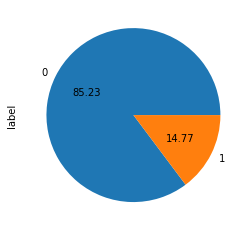

In [53]:
print(y_train.value_counts())
y_train.value_counts().plot.pie(autopct='%0.2f')

Highly Imbalanced Dataset!
Ideas:
- Undersampling: reduce majority class to make it equal to minority class
- Oversampling: increase minority class to make it equal to majority class through resampling
- K-fold cross validation

## Oversampling

In [54]:
!pip install imblearn
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(sampling_strategy="not majority")
X_train_2d = X_train.values.reshape(-1, 1) # puts each elem of array in own array
X_res, y_res = ros.fit_resample(X_train_2d, y_train)

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


1    127
0    127
Name: label, dtype: int64


<AxesSubplot: ylabel='label'>

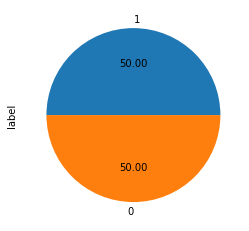

In [55]:
print(y_res.value_counts())
y_res.value_counts().plot.pie(autopct='%0.2f')

In [57]:
#X_res revert 2_dimensionality
X_res_1d = X_res.flatten()

# classification with resampled vectors
X_res_vect_avg = classification.average_vector(X_res_1d)

In [58]:
y_res_pred = classification.classify_predict(X_res_vect_avg, X_test_vect_avg, y_res, "Random Forest")
classification.print_classification_report(y_test, y_res_pred)
y_res_pred = classification.classify_predict(X_res_vect_avg, X_test_vect_avg, y_res, "Multinomial Naive Bayes")
classification.print_classification_report(y_test, y_res_pred)
y_res_pred = classification.classify_predict(X_res_vect_avg, X_test_vect_avg, y_res, "SVM")
classification.print_classification_report(y_test, y_res_pred)

############################################################################
Processing Random Forest Classification

              precision    recall  f1-score   support

    verfolgt       0.97      0.78      0.87        37
    begnadet       0.00      0.00      0.00         1

    accuracy                           0.76        38
   macro avg       0.48      0.39      0.43        38
weighted avg       0.94      0.76      0.84        38

classes in y_pred: {0, 1} classes in y_test: {0, 1}
############################################################################
############################################################################
Processing Multinomial Naive Bayes Classification

              precision    recall  f1-score   support

    verfolgt       0.87      0.90      0.88        29
    begnadet       0.62      0.56      0.59         9

    accuracy                           0.82        38
   macro avg       0.75      0.73      0.73        38
weighted avg       0.81   

## Undersampling

In [59]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=0, sampling_strategy="majority")
X_resampled, y_resampled = rus.fit_resample(X_train_2d, y_train)

0    22
1    22
Name: label, dtype: int64


<AxesSubplot: ylabel='label'>

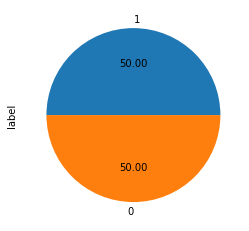

In [60]:
print(y_resampled.value_counts())
y_res.value_counts().plot.pie(autopct='%0.2f')

In [61]:
#X_res revert 2_dimensionality
X_resampled_1d = X_resampled.flatten()

# classification with resampled vectors
X_resampled_vect_avg = classification.average_vector(X_resampled_1d)

In [62]:
y_resampled_pred = classification.classify_predict(X_resampled_vect_avg, X_test_vect_avg, y_resampled, "Random Forest")
classification.print_classification_report(y_test, y_resampled_pred)
y_resampled_pred = classification.classify_predict(X_resampled_vect_avg, X_test_vect_avg, y_resampled, "Multinomial Naive Bayes")
classification.print_classification_report(y_test, y_resampled_pred)
y_resampled_pred = classification.classify_predict(X_resampled_vect_avg, X_test_vect_avg, y_resampled, "SVM")
classification.print_classification_report(y_test, y_resampled_pred)

############################################################################
Processing Random Forest Classification

              precision    recall  f1-score   support

    verfolgt       0.87      0.90      0.88        29
    begnadet       0.62      0.56      0.59         9

    accuracy                           0.82        38
   macro avg       0.75      0.73      0.73        38
weighted avg       0.81      0.82      0.81        38

classes in y_pred: {0, 1} classes in y_test: {0, 1}
############################################################################
############################################################################
Processing Multinomial Naive Bayes Classification

              precision    recall  f1-score   support

    verfolgt       0.87      0.93      0.90        28
    begnadet       0.75      0.60      0.67        10

    accuracy                           0.84        38
   macro avg       0.81      0.76      0.78        38
weighted avg       0.84   